# MIE524 - Lab 4


## Intro to Networkx
https://networkx.org/documentation/stable/index.html

In [1]:
import networkx as nx

G = nx.Graph()

In [2]:
# adding nodes manually

G.add_node(1)

G.add_nodes_from([2, 3])

G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

In [3]:
# adding edges

G.add_edge(1, 2)

G.add_edges_from([(1, 2), (1, 3)])


In [4]:
print(G.number_of_nodes())
print(G.number_of_edges())

5
2


In [5]:
# content of the graph

print(list(G.nodes))
print(list(G.edges))

[1, 2, 3, 4, 5]
[(1, 2), (1, 3)]


In [6]:
# neighbours
list(G.adj[1])

[2, 3]

In [7]:
# degree of node
G.degree[1]

2

In [8]:
# directed graphs
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
print(DG.out_degree(1, weight='weight'))
print(DG.degree(1, weight='weight'))
print(list(DG.successors(1)))
print(list(DG.neighbors(1)))

0.5
1.25
[2]
[2]


### Examining a graph

In [9]:
g = nx.read_edgelist("q1-graph-small.txt",create_using=nx.DiGraph(), nodetype = int)

In [10]:
g.number_of_nodes()

100

In [11]:
g.number_of_edges()

950

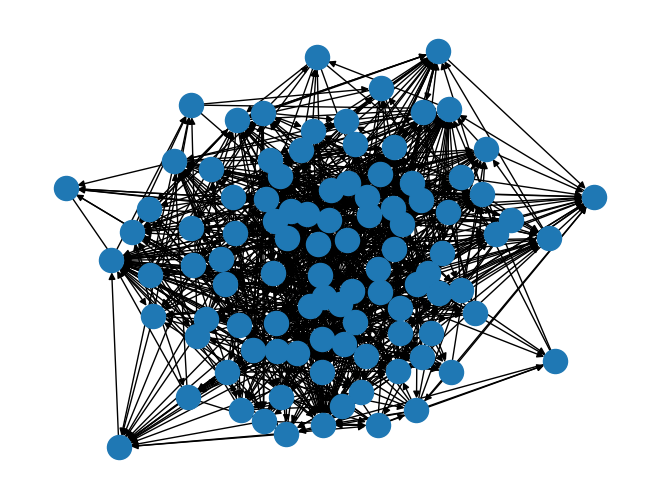

In [12]:
nx.draw(g)

In [13]:
r = nx.pagerank(g, alpha=0.8, max_iter = 40)
r

{100: 0.012945469341739294,
 1: 0.030006335262140676,
 13: 0.018205350623704847,
 28: 0.0063452177333312605,
 89: 0.003922530659371662,
 82: 0.007708851818506571,
 30: 0.007036512184076105,
 79: 0.019612699088194404,
 65: 0.019117577822036595,
 88: 0.004599298883783446,
 25: 0.007385770236260077,
 46: 0.005111437089754117,
 73: 0.007839301795769835,
 59: 0.0036698377112371573,
 50: 0.0042585306076676445,
 11: 0.005011717018017542,
 24: 0.007196182773089874,
 38: 0.007149654934723141,
 44: 0.012750507628973713,
 3: 0.007781037102322166,
 58: 0.005137220412872387,
 14: 0.03417063394225794,
 31: 0.012329751858485394,
 85: 0.003409646124811284,
 17: 0.006247555546181085,
 98: 0.00504095314095755,
 51: 0.008244096841828067,
 94: 0.004248456068948584,
 53: 0.03573069367565955,
 64: 0.007716200596475382,
 33: 0.005326312791328833,
 56: 0.007862800649709338,
 2: 0.005852136000532974,
 26: 0.014339917781998309,
 45: 0.004491740681657253,
 86: 0.004471601706285182,
 67: 0.0076979766884738305,
 1

In [14]:
max(r, key=r.get)

53

In [15]:
r[53]

0.03573069367565955

## Singular Value Decomposition (SVD)
SVD factors a single matrix into matrix U, D and V* respectively, where U and V* are orthogonal matrices. D is a diagonal matrix of singular values.

![SVD](https://www.askpython.com/wp-content/uploads/2020/11/SVD-1.jpg.webp)


In [ ]:
import numpy as np

#Creating a matrix A
A = np.array([[3,4,3],[1,2,3],[4,2,1]])
print(A)

In [ ]:
#Performing SVD
U, D, VT = np.linalg.svd(A)

print(U)
print('\n')
print(D)
print('\n')
print(VT)

In [ ]:
#Checking if we can remake the original matrix using U,D,VT
A_remake = (U @ np.diag(D) @ VT)
print(A_remake)

### Application of SVD for image compression

In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
# read image

plt.rcParams['figure.figsize'] = [16,8]

A = imread('milou.jpeg')
plt.imshow(A)

In [ ]:
X = np.mean(A, -1)
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [ ]:
# compute SVD
U, D, VT = np.linalg.svd(X, full_matrices = False)

In [ ]:
# Extract Diagonal Singular Values from the Sigma matrix
D = np.diag(D)

In [ ]:
U.shape

In [ ]:
i = 0

def imdisplay(k):
    X_ap = U[:,:k] @ D[0:k,:k] @ VT[:k,:]
    img = plt.imshow(X_ap)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('k = ' + str(k))
    plt.show()

imdisplay(k=820)

In [ ]:
imdisplay(k=100)

In [ ]:
imdisplay(k=20)

In [ ]:
imdisplay(k=5)

### Application of SVD for dimensionality reduction

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD

In [ ]:
# X = load_digits().data
# X = X / 255

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

plt.matshow(data[0].reshape((8, 8)), cmap = 'gray')
plt.show()

In [ ]:
svd = TruncatedSVD(n_components=5)
data_svd = svd.fit_transform(data)

image = svd.inverse_transform(data_svd[0].reshape(1, -1))
plt.matshow(image.reshape((8, 8)), cmap = "gray")
plt.show()

In [ ]:
print(f"Dimensions of original image: {data[0].shape[0]}")
print(f"Dimensions of reduced image: {data_svd[0].shape[0]}")

In [ ]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
pca_data = pca.transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=pca_data, labels=labels)

svd = TruncatedSVD(n_components=n_digits)
data_svd = svd.fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="SVD-based", data=data_svd, labels=labels)
print(82 * "_")